In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.svm import LinearSVR

In [2]:
data = pd.read_csv('Boston Housing Prices.csv')
print(data.describe())
print(data.corr())
print(abs(data.corr())['medv'].sort_values(ascending=False))

       Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   253.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      1.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    127.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    253.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    379.750000    3.677082   12.500000   18.100000    0.000000    0.624000   
max    506.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

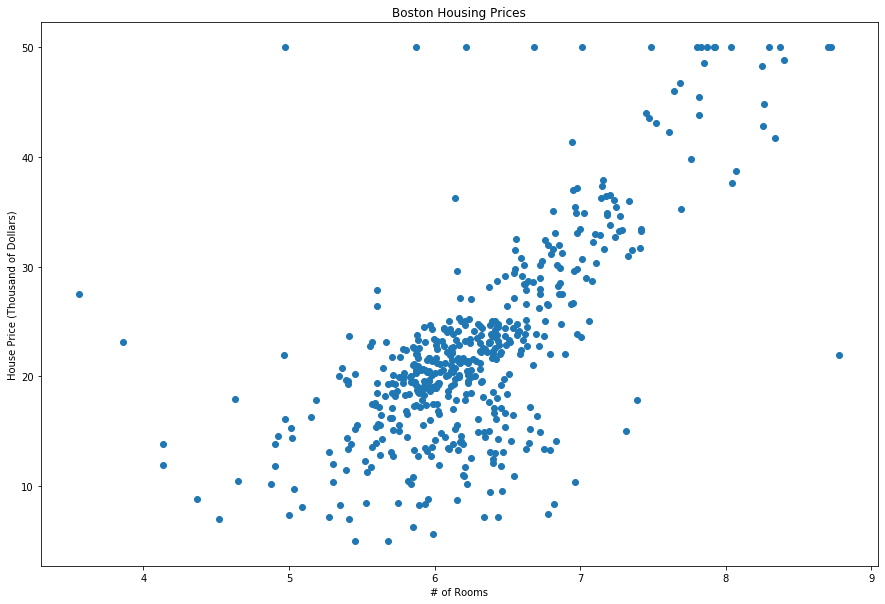

In [3]:
plt.figure(figsize=(15,10))
plt.scatter(x=data['rm'], y=data['medv'])
plt.xlabel('# of Rooms')
plt.ylabel('House Price (Thousand of Dollars)')
plt.title('Boston Housing Prices')
plt.show()

In [4]:
X = np.array(data['rm']).reshape(-1,1)
y = np.array(data['medv']).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
y_train = y_train.reshape(len(y_train),)
y_test = y_test.reshape(len(y_test),)

In [5]:
lm = LinearRegression()
lm.fit(X_train, y_train.ravel())

LinearRegression()

In [6]:
# Linear Regression
print("Intercept: {:,.3f}".format(lm.intercept_))
print("Coefficient: {:,.3f}".format(lm.coef_[0]))
mean = mean_absolute_error(y_test, lm.predict(X_test))
print("MAE = ${:,.2f}".format(1000*mean))
print("\n")

Intercept: -35.424
Coefficient: 9.213
MAE = $4,521.71




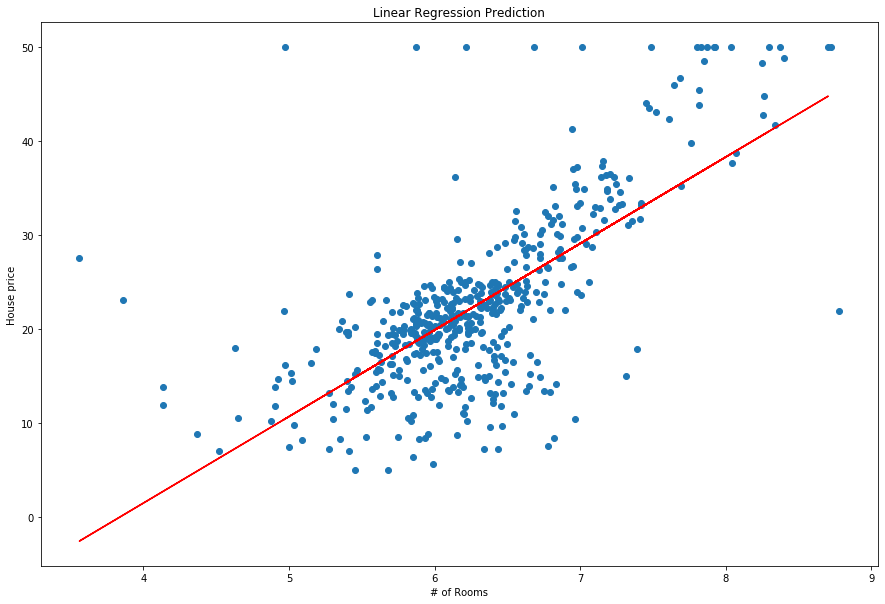

In [7]:
plt.figure(figsize=(15,10))
plt.scatter(x=data['rm'], y=data['medv'])
plt.plot(X_test,lm.predict(X_test), color='red')
plt.xlabel('# of Rooms')
plt.ylabel('House price')
plt.title('Linear Regression Prediction')
plt.show()

In [8]:
#SVR
def svr_results(y_test, X_test, fitted_svr_model):
    print("C: {}".format(fitted_svr_model.C))
    print("Epsilon: {}".format(fitted_svr_model.epsilon))
    print("Intercept {:,.3f}".format(fitted_svr_model.intercept_[0]))
    print("Coefficient: {:,.3f}".format(fitted_svr_model.coef_[0]))
    mean = mean_absolute_error(y_test , fitted_svr_model.predict(X_test))
    print("MAE = ${:,.2f}".format(1000*mean))
    perc_within_eps = 100*np.sum(y_test - fitted_svr_model.predict(X_test) < eps) / len(y_test)
    print("percentage within Elipson = {:,.2f}%".format(perc_within_eps))
    print("\n")
    
    plt.figure(figsize=(15,11))
    plt.scatter(x=data['rm'], y=data['medv'])
    plt.plot(X_test,  fitted_svr_model.predict(X_test), color='yellow')
    plt.plot(X_test,  fitted_svr_model.predict(X_test)+eps, color='black')
    plt.plot(X_test,  fitted_svr_model.predict(X_test)-eps, color='black')
    
    axes = plt.gca()
    axes.set_xlim([3,10])
    axes.set_ylim([0,55])
    #plt.plot(X_test,lm.predict(X_test), color='red')
    plt.xlabel('# of Rooms')
    plt.ylabel('House price')
    plt.title('Support Vector Regression Prediction')
    plt.show()


C: 0.01
Epsilon: 5
Intercept 0.370
Coefficient: 3.138
MAE = $5,885.22
percentage within Elipson = 74.51%




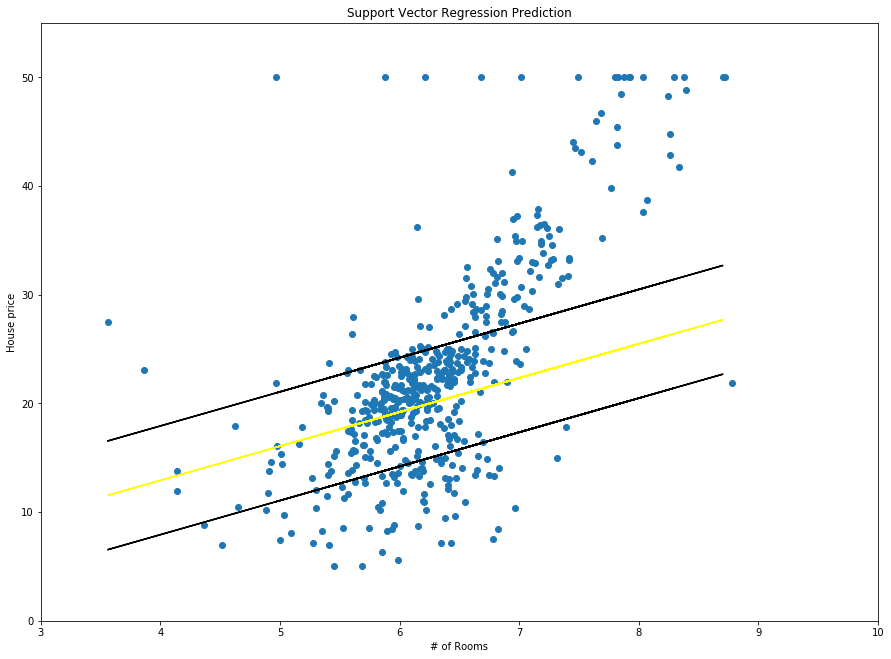

C: 1.0
Epsilon: 5
Intercept -9.963
Coefficient: 5.158
MAE = $4,921.61
percentage within Elipson = 81.37%




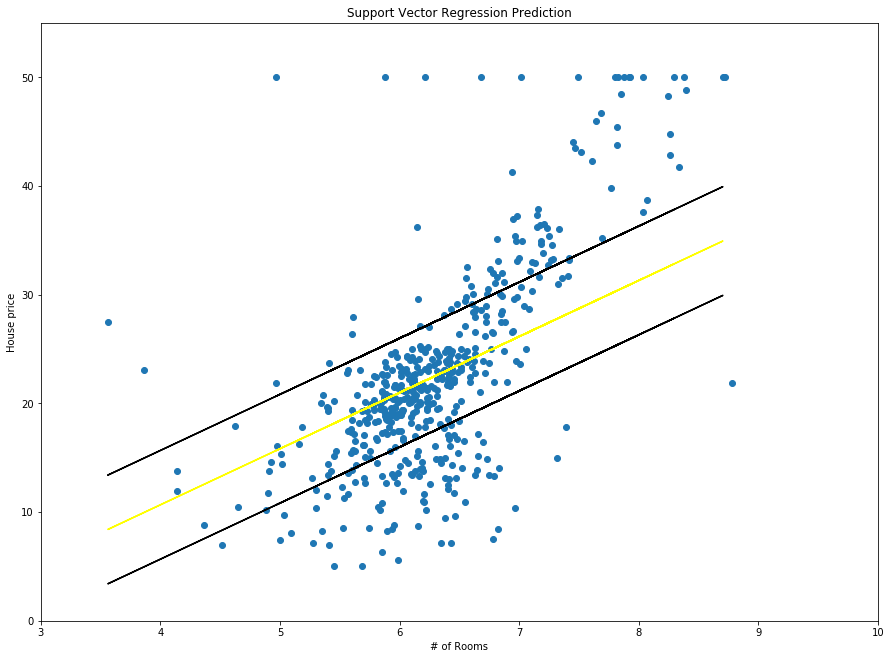

In [9]:
eps = 5
svr = LinearSVR(epsilon=eps, C=0.01, fit_intercept=True)   
svr.fit(X_train, y_train.ravel()) 
svr_results(y_test, X_test, svr)

# a larger C
eps = 5
svr = LinearSVR(epsilon=eps, C=1.0, fit_intercept=True)   
svr.fit(X_train, y_train.ravel()) 
svr_results(y_test, X_test, svr)
test_mae_list = []
perc_within_eps_list = []

eps = 5
c_space = np.linspace(0.01, 10)


In [10]:
for c in c_space:
    varied_svr = LinearSVR(epsilon=eps, C=c, fit_intercept=True, max_iter=10000)
    
    varied_svr.fit(X_train, y_train.ravel())
    
    test_mae = mean_absolute_error(y_test, varied_svr.predict(X_test))
    test_mae_list.append(test_mae.ravel())
    
    perc_within_eps = 100*np.sum(abs(y_test-varied_svr.predict(X_test)) <= eps) / len(y_test)
    perc_within_eps_list.append(perc_within_eps.ravel())

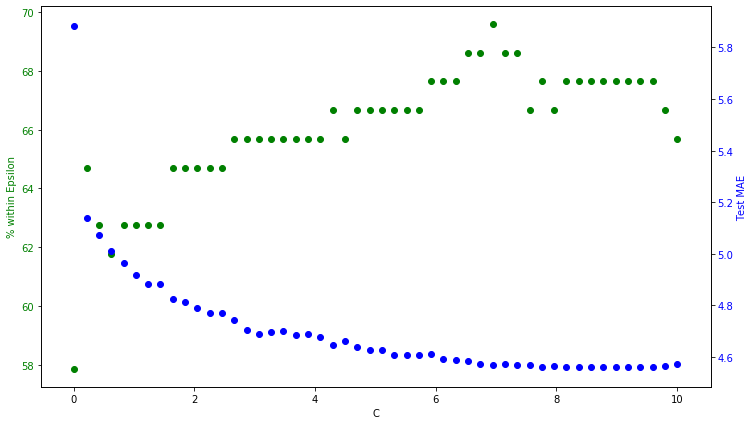

In [11]:
fig, ax1 = plt.subplots(figsize=(12,7))
ax1.set_xlabel('C')
ax1.set_ylabel('% within Epsilon', color='green')
ax1.scatter(c_space, perc_within_eps_list, color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Test MAE', color='blue')  # we already handled the x-label with ax1
ax2.scatter(c_space, test_mae_list, color='blue')
ax2.tick_params(axis='y', labelcolor='blue')
plt.show()

best C = 6.941836734693878
C: 6.941836734693878
Epsilon: 5
Intercept -29.482
Coefficient: 8.237
MAE = $4,571.40
percentage within Elipson = 85.29%




E:\anaconda\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


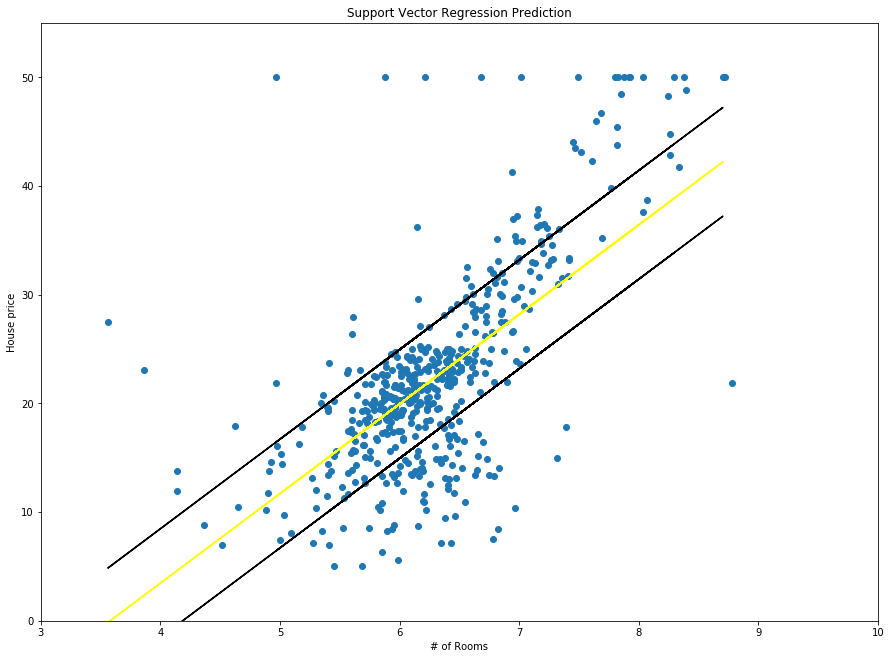

In [12]:
m = max(perc_within_eps_list)
inds = [i for i, j in enumerate(perc_within_eps_list) if j == m]
c = c_space[inds[0]]
print("best C =", c)    
eps = 5
svr = LinearSVR(epsilon=eps, C=c, fit_intercept=True)   
svr.fit(X_train, y_train.ravel()) 
svr_results(y_test.ravel(), X_test, svr)